# Lab - Model selection

The aim of this lab session is to
* measure the empirical risk of a supervised learning model for different sample sizes (i.e. different quantities of training samples)
* select the optimal value and evaluate the generalisability of a supervised learning (classification) model using 
 * a division into training, validation and test data 
 * the principle of cross-validation

In [1]:
import numpy as np
import pandas as pd

import random

import seaborn as sn

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Part 1. Data

The data used in this tutorial are images of handwritten numbers. Automatic recognition of these digits (and more generally of handwriting) is a classic but complex problem. It is used in particular in automatic mail sorting systems.
The data used for this tutorial corresponds to a simplified extract from the MNIST (Modified National Institute of Standards and Technology) data set, which originally contained 70,000 images of digits (0 to 9). 

Each image (i.e. an observation) is 8 pix in size. This corresponds to a vector made up of $d=64$ variables ($\mathbf{x}_i \in \mathbb{R}^d$ for $1\le i\le m$).

**Note**: The 8 pix $\times$ 8 pix thumbnails are obtained by applying a dimension reduction to the original 32 pix $\times$ 32 pix binary images. The original images were cut into blocks of 4 $\times$ 4 pix. (with no overlap). In each block, the number of "1s" used as new pixel values was counted to create a (non-binary) image of size 8 pix. $\times$ 8 pix with each pixel able to have a value between 0 and 16.

In [2]:
#-- Downloading the data
digits = datasets.load_digits()
X = digits.data
Y = digits.target
#print(digits.DESCR)

<Figure size 432x288 with 0 Axes>

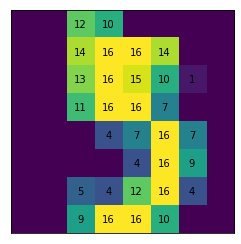

Variables:  [ 0.  0. 12. 10.  0.  0.  0.  0.  0.  0. 14. 16. 16. 14.  0.  0.  0.  0.
 13. 16. 15. 10.  1.  0.  0.  0. 11. 16. 16.  7.  0.  0.  0.  0.  0.  4.
  7. 16.  7.  0.  0.  0.  0.  0.  4. 16.  9.  0.  0.  0.  5.  4. 12. 16.
  4.  0.  0.  0.  9. 16. 16. 10.  0.  0.]
Classe asociée:  5


<Figure size 432x288 with 0 Axes>

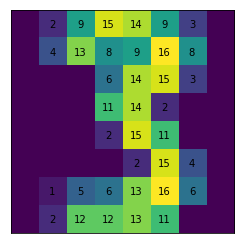

Variables:  [ 0.  2.  9. 15. 14.  9.  3.  0.  0.  4. 13.  8.  9. 16.  8.  0.  0.  0.
  0.  6. 14. 15.  3.  0.  0.  0.  0. 11. 14.  2.  0.  0.  0.  0.  0.  2.
 15. 11.  0.  0.  0.  0.  0.  0.  2. 15.  4.  0.  0.  1.  5.  6. 13. 16.
  6.  0.  0.  2. 12. 12. 13. 11.  0.  0.]
Classe asociée:  3


In [3]:
#-- Data visualisation
disp_imgno = [5, 13] # Test other values
for ll in disp_imgno:
    plt.figure()
    plt.matshow(digits.images[ll])
    for (i, j), z in np.ndenumerate(digits.images[ll]):
        if z!=0:
            plt.text(j, i, '{:d}'.format(int(z)), ha='center', va='center')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.show()
    print("Variables: ", X[ll,:])
    print("Label: ", Y[ll])

**Questions** : 
* What is the link between the images (`digit.images[ll]`) and the variables (`X[ll,:]`) + the labels (`Y[ll]`)? 
* What is the number of training data?

## Part 2. Influence of the sample size
The objective here is to evaluate the performance of a classification algorithm (empirical risk and real risk), the $k$-Nearest Neighbours (NN), when the number of training data increases ($m$).

### 1. Empiric risk

**2.1.a** Apply a $k$-PPV with $k=1$. Calculate the error rate (which corresponds to the empirical risk $\mathcal{R}_{emp}$) and explain the result.

**Tips**: 
* You can use the $k$-PPV algorithm from Scikit-Learn: [doc](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Find the name of the hyperparameter that allows you to set the number of neighbours considered during learning ($k$).
* The error rate is equal to 1 - Overall Accuracy. You can implement your own function or use Scikit-Learn fonctionalities

In [ ]:
#-- Write your code here

**2.1.b** Apply a $k$-PPV with $k=5$. Calculate the error rate $\mathcal{R}_{emp}$ and display the confusion matrix.

**Tip**: 
Let `C` be your confusion matrix.
* For a simple display of the confusion matrix :
``` 
plt.figure()
plt.imshow(C)
plt.show()
```
* For a more elaborate display with Seaborn :
```
labels = data.target_names
df_cm = pd.DataFrame(C, index = [i for i in labels],columns = [i for i in labels])
plt.figure()
sn.heatmap(df_cm, annot=True, fmt='d')
```

In [ ]:
#-- Write your code here

**2.1.c** Plot the evolution of the empirical risk, for $k=5$, as a function of the size of the training data.
* Define the different training sizes: `size = [5, 10, 25, 50, 75, 100, 150, 200, 250, 500, 1000, 1500]`.
* Draw a random sample of the given size.
Note: you can also use the `random.sample` method in the `random` module.
* Apply a $5$-PPV for each sample size and calculate $\mathcal{R}_{emp}$ the empirical risk.
* Plot the evolution of the empirical risk as a function of sample size: $\mathcal{R}_{emp}=f(size)$.

**Comment**

In [ ]:
#-- Write your code here

### 2. Real risk and generalisation error, $k$ fixed

**2.2.a** Calculate an estimate of the generalisation error using a training and test set ($N=297$), for the different training sample sizes tested above (size), and always considering a $5$-PPV.
* Randomly divide the samples into training and test subsets: ` Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=N)` where `N` is the desired test sample size.
* Superimpose the two curves showing the evolution of the empirical risk and the real risk as a function of the size of the training sample. Feel free to display the curves only for the largest training sample sizes.

**Compare and comment**

In [1]:
#-- Write your code here

**2.2.b** Up to now, the results have been obtained for a single repetition, although the results depend on the split between the training and test data. This procedure is generally repeated several times in order to obtain the mean and variance of the results.

Repeat the previous procedure (2.2.a) 20 times, and calculate the mean empirical and true risks, as well as the associated variances. Compare the results with those obtained from a single repetition.

**Tip**: you can display the results using plt.errorbar() to display the curve +/- one standard deviation.

**Comment**

In [4]:
#-- Rerun for 20 runs

In [5]:
#-- Display the resuls

**2.2.c** Carry out a cross validation on 5 subsets / partitions (*$5$-fold cross validation*) on all the training data (always with the $5$-PPV). Give an estimate of the generalisation error: `scores = cross_val_score(knn, X, Y, cv=5)` [doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross_val_score#sklearn.model_selection.cross_val_score).

**Question**: What is the average Overall Accuracy value you obtain?

In [ ]:
#-- Write your code here

**Your answer**:

## Part 3. Selecting the best $k$-hyperparameter (of the $k$-PPV) and estimating generalisation

The aim of this part is to determine the best value for the $k$ hyperparameter of the PPV algorithm and to evaluate the generalisation performance.

**3.1** Plot the evolution of the empirical risk for $k\in [1,30]$. **Comment**

In [ ]:
#-- Write your code here

**Your comment**:

**3.2** Create a training set containing 80% of the data. The remaining 20% will be test data.

In [ ]:
#-- Write your code here

**3.3** For $k\in [1,30]$, perform a 5 subset cross-validation (*$5$-fold cross-validation*) on the training dataset. The same training dataset will be considered.

In [ ]:
#-- Write your code here

**3.4** What is the best value of $k$ to choose?

**Your answer**

**3.5** For this optimal value of $k$, give an estimate of the real risk. The learning step will be carried out on the training and validation data.

In [ ]:
#-- Write your code here

**3.6** Compute the confusion matrix for the model. What do you think of this model?

In [ ]:
#-- Write your code here

**Your answer**

**3.7** Finally, give an estimate of the real risk by implementing a nested cross validation (with $k=10$ for the outter loop).

What is the value of the average real risk you obtain?

In [ ]:
#-- Write your code here

**Your answer**